# Combining Myprotein and GNC to analyze and do visualizations

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
gnc = pd.read_csv('data/gnc_nutrition_final.csv')
myprotein = pd.read_csv('data/myprotein_final.csv')

nutrition_df = pd.concat([gnc, myprotein], ignore_index=True)
nutrition_df

,Store,Product Name,Product Link,Price,Num Reviews,Avg Rating,Calories,Protein (g),Total Num Servings,Serving Size,Serving Size (g)
0,GNC,RYSE Loaded Protein - Jet-Puffed Marshmallow,https://www.gnc.com/whey-protein/556534.html,49.99,136,4.50,130.0,25.0,27.0,1 scoop,33.0
1,GNC,Jym® Pro Jym Protein - Tahitian Vanilla Bean,https://www.gnc.com/whey-protein/533909.html,74.99,937,5.00,140.0,24.0,45.0,1 scoop,33.0
2,GNC,Axe & Sledge Supplements™ Farm Fed 100% Whey P...,https://www.gnc.com/whey-protein/581725.html,56.99,107,4.50,130.0,25.0,28.0,1 scoop,35.0
3,GNC,Raw Nutrition Itholate Protein - Chocolate Pea...,https://www.gnc.com/whey-protein/604706.html,54.99,35,4.50,150.0,28.0,25.0,1 scoop,33.0
4,GNC,RYSE Loaded Protein - Little Debbie Christmas ...,https://www.gnc.com/whey-protein/556566.html,49.99,136,4.50,140.0,25.0,27.0,1 scoop,33.0
...,...,...,...,...,...,...,...,...,...,...,...
418,Myprotein,Origin Protein Sample,https://us.myprotein.com/p/sports-nutrition/or...,3.99,1,5.00,170.0,30.0,1.0,2 packets,49.0
419,Myprotein,Impact Whey Isolate (Sample),https://us.myprotein.com/p/sports-nutrition/im...,3.99,15,5.00,110.0,22.0,1.0,1 scoop,25.0
420,Myprotein,THE Whey (NSF),https://us.myprotein.com/p/sports-nutrition/th...,54.99,35,4.26,90.0,20.0,30.0,1 scoop,27.9
421,Myprotein,Impact Whey Protein (Sample),https://us.myprotein.com/p/sports-nutrition/im...,3.49,25,4.56,100.0,19.0,1.0,1 scoop,25.0


In [16]:
nutrition_df.isnull().sum()

Store                 0
Product Name          0
Product Link          0
Price                 0
Num Reviews           0
Avg Rating            0
Calories              0
Protein (g)           0
Total Num Servings    0
Serving Size          0
Serving Size (g)      0
dtype: int64

In [17]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Store               423 non-null    object 
 1   Product Name        423 non-null    object 
 2   Product Link        423 non-null    object 
 3   Price               423 non-null    float64
 4   Num Reviews         423 non-null    int64  
 5   Avg Rating          423 non-null    float64
 6   Calories            423 non-null    float64
 7   Protein (g)         423 non-null    float64
 8   Total Num Servings  423 non-null    float64
 9   Serving Size        423 non-null    object 
 10  Serving Size (g)    423 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 36.5+ KB


In [20]:
# 1. Price Per Serving ($)
# How much does it cost every time you make a shake?
nutrition_df['Price_Per_Serving'] = nutrition_df['Price'] / nutrition_df['Total Num Servings']

# 2. Protein Per Dollar (g/$)
# The "Efficiency" Metric: How much actual protein do you get for $1.00?
nutrition_df['Protein_Per_Dollar'] = nutrition_df['Protein (g)'] / nutrition_df['Price_Per_Serving']

# 3. Protein Density (%)
# The "Purity" Metric: What percentage of the powder is protein vs. filler/flavor?
nutrition_df['Protein_Density'] = (nutrition_df['Protein (g)'] / nutrition_df['Serving Size (g)']) * 100

# Preview the new metrics
nutrition_df

,Store,Product Name,Product Link,Price,Num Reviews,Avg Rating,Calories,Protein (g),Total Num Servings,Serving Size,Serving Size (g),Price_Per_Serving,Protein_Per_Dollar,Protein_Density
0,GNC,RYSE Loaded Protein - Jet-Puffed Marshmallow,https://www.gnc.com/whey-protein/556534.html,49.99,136,4.50,130.0,25.0,27.0,1 scoop,33.0,1.851481,13.502701,75.757576
1,GNC,Jym® Pro Jym Protein - Tahitian Vanilla Bean,https://www.gnc.com/whey-protein/533909.html,74.99,937,5.00,140.0,24.0,45.0,1 scoop,33.0,1.666444,14.401920,72.727273
2,GNC,Axe & Sledge Supplements™ Farm Fed 100% Whey P...,https://www.gnc.com/whey-protein/581725.html,56.99,107,4.50,130.0,25.0,28.0,1 scoop,35.0,2.035357,12.282857,71.428571
3,GNC,Raw Nutrition Itholate Protein - Chocolate Pea...,https://www.gnc.com/whey-protein/604706.html,54.99,35,4.50,150.0,28.0,25.0,1 scoop,33.0,2.199600,12.729587,84.848485
4,GNC,RYSE Loaded Protein - Little Debbie Christmas ...,https://www.gnc.com/whey-protein/556566.html,49.99,136,4.50,140.0,25.0,27.0,1 scoop,33.0,1.851481,13.502701,75.757576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,Myprotein,Origin Protein Sample,https://us.myprotein.com/p/sports-nutrition/or...,3.99,1,5.00,170.0,30.0,1.0,2 packets,49.0,3.990000,7.518797,61.224490
419,Myprotein,Impact Whey Isolate (Sample),https://us.myprotein.com/p/sports-nutrition/im...,3.99,15,5.00,110.0,22.0,1.0,1 scoop,25.0,3.990000,5.513784,88.000000
420,Myprotein,THE Whey (NSF),https://us.myprotein.com/p/sports-nutrition/th...,54.99,35,4.26,90.0,20.0,30.0,1 scoop,27.9,1.833000,10.911075,71.684588
421,Myprotein,Impact Whey Protein (Sample),https://us.myprotein.com/p/sports-nutrition/im...,3.49,25,4.56,100.0,19.0,1.0,1 scoop,25.0,3.490000,5.444126,76.000000


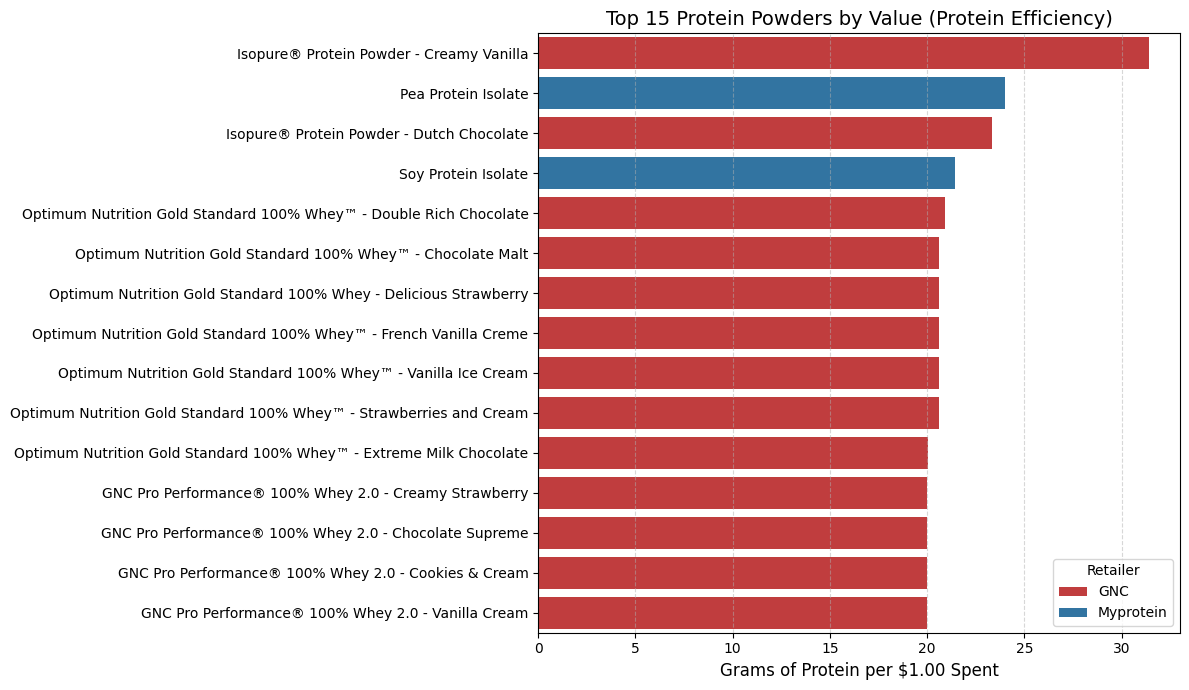

In [21]:
# Filter for Top 15 Best Value Products
top_value = nutrition_df.sort_values('Protein_Per_Dollar', ascending=False).head(15)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_value, 
    y='Product Name', 
    x='Protein_Per_Dollar', 
    hue='Store', 
    dodge=False,
    palette={'GNC': '#d62728', 'Myprotein': '#1f77b4'}  # Brand colors
)

plt.title('Top 15 Protein Powders by Value (Protein Efficiency)', fontsize=14)
plt.xlabel('Grams of Protein per $1.00 Spent', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Retailer')
plt.tight_layout()
plt.show()

- best value leaderboard
- which one has the best value for protein

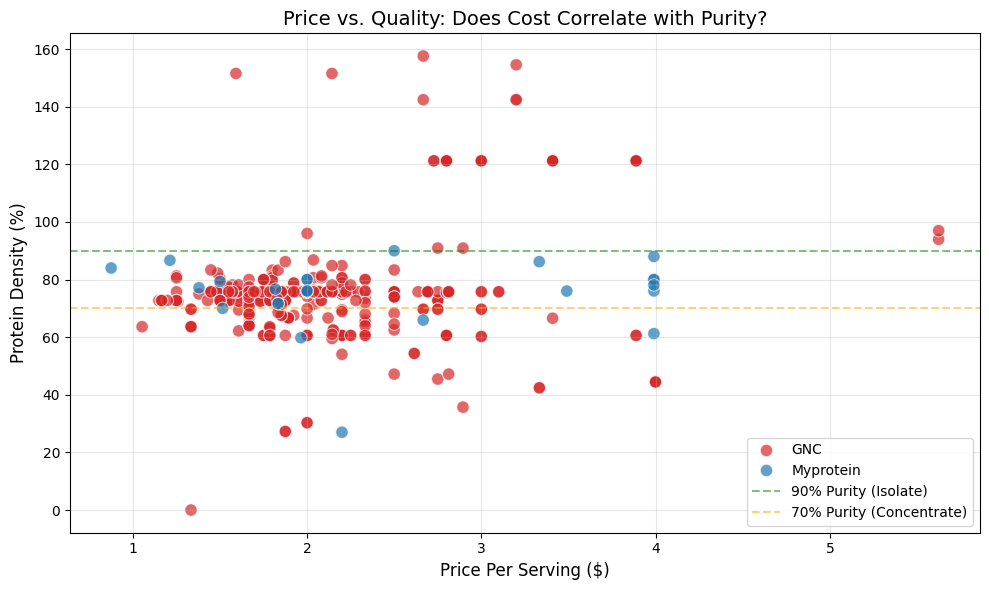

In [22]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=nutrition_df, 
    x='Price_Per_Serving', 
    y='Protein_Density', 
    hue='Store', 
    alpha=0.7, 
    s=80,
    palette={'GNC': '#d62728', 'Myprotein': '#1f77b4'}
)

# Add a reference line for "Standard Isolate" (approx 90% purity)
plt.axhline(y=90, color='green', linestyle='--', alpha=0.5, label='90% Purity (Isolate)')
plt.axhline(y=70, color='orange', linestyle='--', alpha=0.5, label='70% Purity (Concentrate)')

plt.title('Price vs. Quality: Does Cost Correlate with Purity?', fontsize=14)
plt.xlabel('Price Per Serving ($)', fontsize=12)
plt.ylabel('Protein Density (%)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- price vs. purity, are expensive proteins actually cleaner?

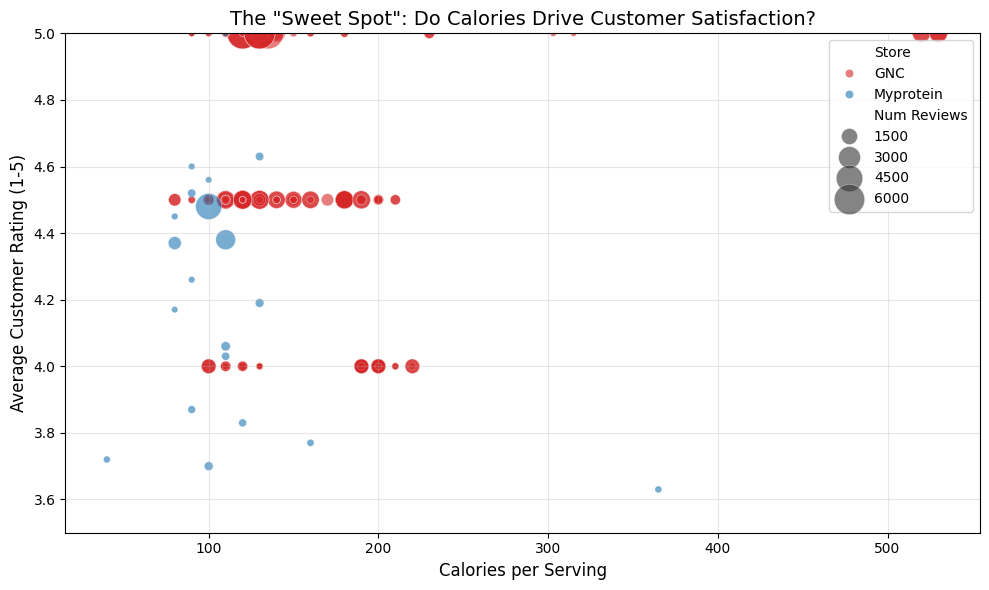

In [23]:
plt.figure(figsize=(10, 6))

# Filter out items with 0 reviews to avoid skewing the plot
rated_df = nutrition_df[nutrition_df['Num Reviews'] > 10]

sns.scatterplot(
    data=rated_df, 
    x='Calories', 
    y='Avg Rating', 
    size='Num Reviews',  
    sizes=(20, 500),    # Bubble size range
    hue='Store',
    alpha=0.6,
    palette={'GNC': '#d62728', 'Myprotein': '#1f77b4'}
)

plt.title('The "Sweet Spot": Do Calories Drive Customer Satisfaction?', fontsize=14)
plt.xlabel('Calories per Serving', fontsize=12)
plt.ylabel('Average Customer Rating (1-5)', fontsize=12)
plt.ylim(3.5, 5.0)  # Zoom in on the relevant rating range
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

flavor vs. fuel check, do customers prefer high-calorie (tasty) shakes over pure ones?

/var/folders/z_/9h44s4jd1_v60ytmp987cz8m0000gn/T/ipykernel_47716/932249291.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=nutrition_df, x='Flavor_Category', y='Avg Rating', palette='pastel')


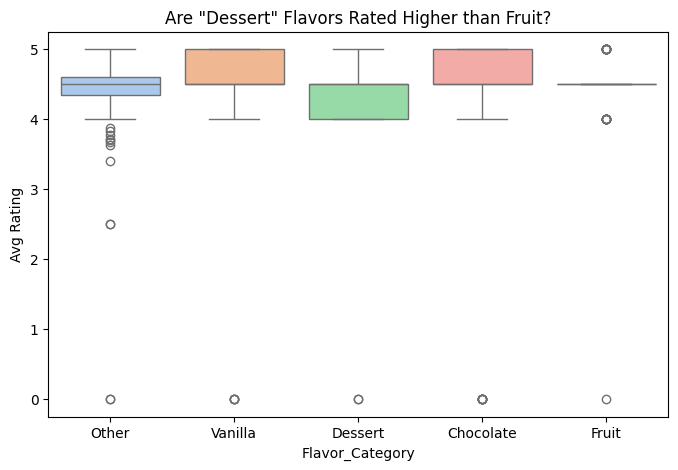

In [26]:
def categorize_flavor(name):
    name = name.lower()
    if 'chocolate' in name or 'cocoa' in name or 'fudge' in name:
        return 'Chocolate'
    elif 'vanilla' in name:
        return 'Vanilla'
    elif any(x in name for x in ['berry', 'fruit', 'strawberry', 'lemon', 'orange', 'mango']):
        return 'Fruit'
    elif 'cookie' in name or 'cake' in name or 'cream' in name:
        return 'Dessert'
    else:
        return 'Other'

nutrition_df['Flavor_Category'] = nutrition_df['Product Name'].apply(categorize_flavor)

# Visualization: Flavor vs. Rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=nutrition_df, x='Flavor_Category', y='Avg Rating', palette='pastel')
plt.title('Are "Dessert" Flavors Rated Higher than Fruit?')
plt.show()

You can categorize products by flavor to see if certain flavors are cheaper or higher rated.

Hypothesis: "Basic flavors (Chocolate/Vanilla) are cheaper/purer than exotic flavors (Fruity Cereal/Birthday Cake)."

How: Use regex to tag rows as "Chocolate", "Vanilla", "Fruit", or "Other".

In [27]:
from scipy import stats

# 1. Isolate the data
gnc_values = nutrition_df[nutrition_df['Store'] == 'GNC']['Protein_Per_Dollar'].dropna()
mp_values = nutrition_df[nutrition_df['Store'] == 'Myprotein']['Protein_Per_Dollar'].dropna()

# 2. Run T-Test
t_stat, p_value = stats.ttest_ind(gnc_values, mp_values, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

if p_value < 0.05:
    print("✅ RESULT: The difference in value between stores is STATISTICALLY SIGNIFICANT.")
else:
    print("❌ RESULT: The difference is likely due to chance.")

T-Statistic: 1.5936
P-Value: 1.2401e-01
❌ RESULT: The difference is likely due to chance.


Your charts might show that MyProtein is cheaper than GNC, but is the difference statistically significant, or just random noise? Running a simple T-Test proves you understand statistics.